# Logistic Regression
  建立逻辑回归模型，预测学生入学概率，自实现逻辑回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\1\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
pdData.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam2 score')

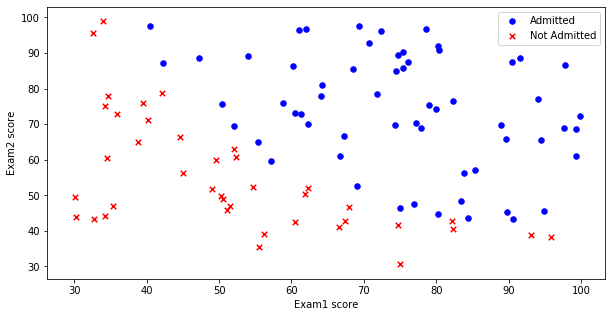

In [14]:
# matplotlib画图
Positive = pdData[pdData['Admitted'] == 1]
Negative = pdData[pdData['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(Positive['Exam1'], Positive['Exam2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(Negative['Exam1'], Negative['Exam2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')

### 逻辑回归
目标：建立分类器（求解三个参数  𝜃0𝜃1𝜃2）
设定阈值，根据阈值判断录取结果

### 需完成的模块
* sigmoid:映射到概率的函数
* model:返回预测结果值
* cost:根据参数计算损失
* gradient:计算每个参数的梯度方向
* descent:计算参数更新
* accuracy:计算精度

#### sigmoid函数
g(z) = 1/(1 + e^(-z))

In [17]:
# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

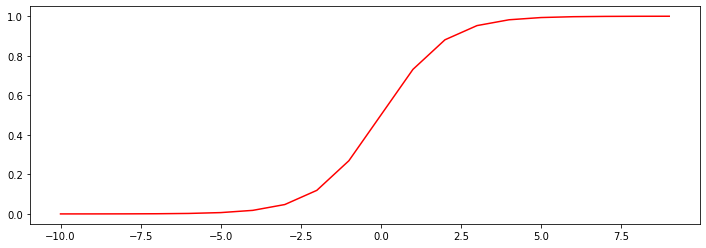

In [20]:
# sigmoid函数图像
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(nums, sigmoid(nums), c='r')

In [66]:
# 定义模型
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [56]:
# 插入一列全为1的列与theta相乘
#pdData.insert(0, 'Ones', 1)
pdData.head()

# 取特征值和目标值
orig_data = pdData.values
cols = orig_data.shape[1]
X = orig_data[:, 0:cols-1]
Y = orig_data[:, cols-1:cols]

# 初始化theta
theta = np.zeros([1, 3])

In [58]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [59]:
Y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [60]:
theta

array([[0., 0., 0.]])

In [68]:
X.shape, Y.shape, theta.T.shape

((100, 3), (100, 1), (3, 1))

损失函数
将对数似然函数去负号

𝐷(ℎ𝜃(𝑥),𝑦)=−𝑦log(ℎ𝜃(𝑥))−(1−𝑦)log(1−ℎ𝜃(𝑥))
 
求平均损失
𝐽(𝜃)=1𝑛∑𝑖=1𝑛𝐷(ℎ𝜃(𝑥𝑖),𝑦𝑖)

In [64]:
# 定义损失函数
def cost(X, Y, theta):
    left = np.multiply(-Y, np.log(model(X, theta)))
    right = np.multiply(1 - Y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [69]:
cost(X, Y, theta)

0.6931471805599453

#### 计算梯度
∂𝐽∂𝜃𝑗=−1𝑚∑𝑖=1𝑛(𝑦𝑖−ℎ𝜃(𝑥𝑖))𝑥𝑖𝑗

In [70]:
# 计算梯度
def gradient(X, Y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- Y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

### Gradient descent

比较3种不同的梯度下降方法

In [71]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [72]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    Y = data[:, cols-1:]
    return X, Y

In [73]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [74]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

设置迭代次数

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 2.40s


array([[-0.00027127,  0.00705232,  0.00376711]])

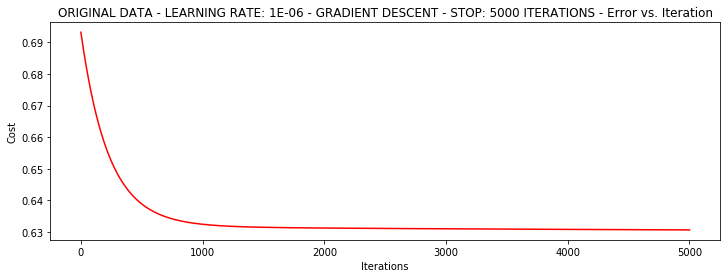

In [75]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止

设定阈值 1E-6, 差不多需要110 000次迭代

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 42.29s


array([[-5.13364014,  0.04771429,  0.04072397]])

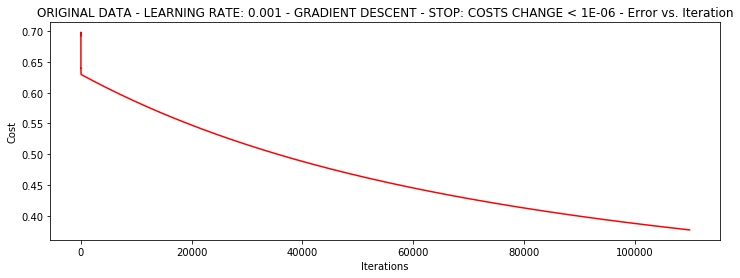

In [77]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

#### 根据梯度变化停止

设定阈值 0.05,差不多需要40 000次迭代

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 20.18s


array([[-2.37033409,  0.02721692,  0.01899456]])

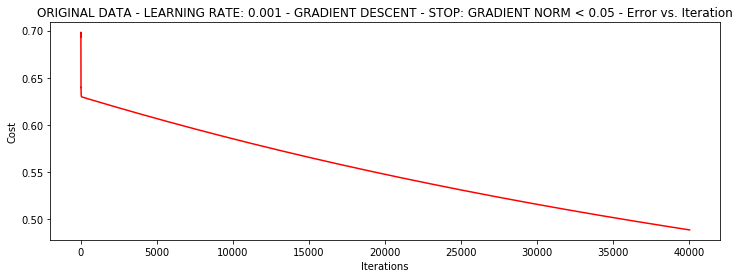

In [79]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### 对比不同的梯度下降方案

Stochastic descent

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.37531261 -0.01232277  0.00543177]] - Iter: 5000 - Last cost: 0.91 - Duration: 0.61s


array([[-0.37531261, -0.01232277,  0.00543177]])

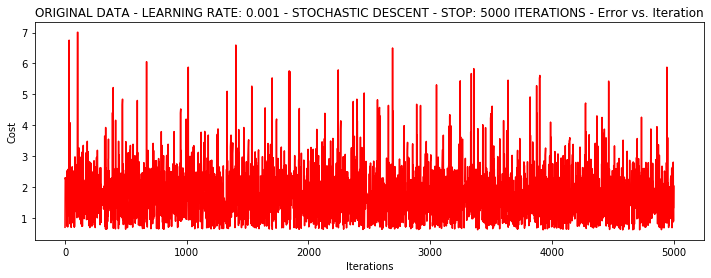

In [80]:
# 1个样本训练5000次
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

梯度爆炸，很不稳定，调小学习率

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00201898  0.01017611  0.00111067]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.77s


array([[-0.00201898,  0.01017611,  0.00111067]])

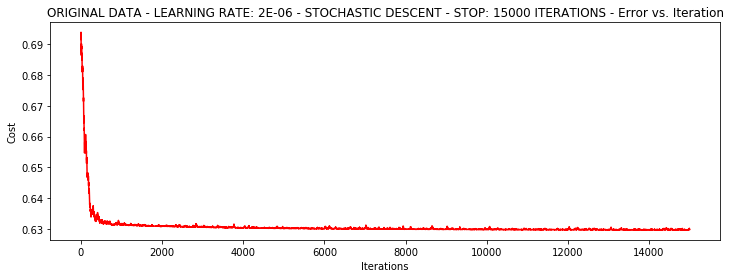

In [81]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

速度快，但稳定性差，需要很小的学习率

Mini-batch descent

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03722737  0.03171209  0.03192031]] - Iter: 15000 - Last cost: 1.00 - Duration: 2.54s


array([[-1.03722737,  0.03171209,  0.03192031]])

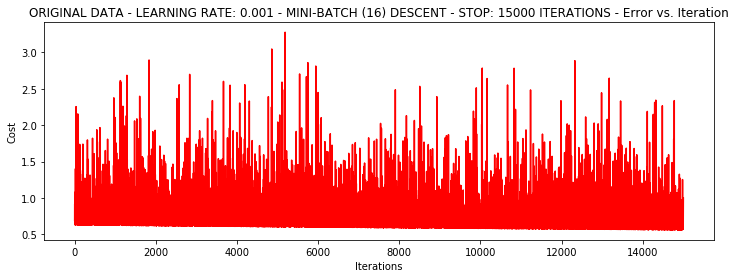

In [82]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)

浮动仍然比较大，我们来尝试下对数据进行标准化 将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

### 数据预处理（标准化）

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 2.35s


array([[0.3080807 , 0.86494967, 0.77367651]])

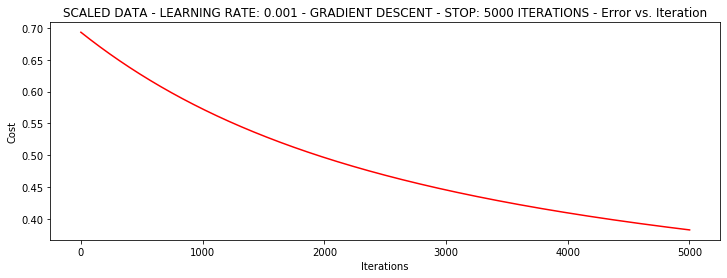

In [84]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

## 数据预处理很重要

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 27.98s


array([[1.0707921 , 2.63030842, 2.41079787]])

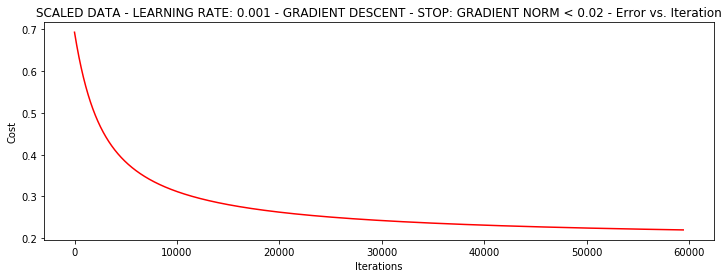

In [85]:
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

更多的迭代次数会使损失下降的更多

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.14806413 2.79256617 2.56799267]] - Iter: 72676 - Last cost: 0.22 - Duration: 10.86s


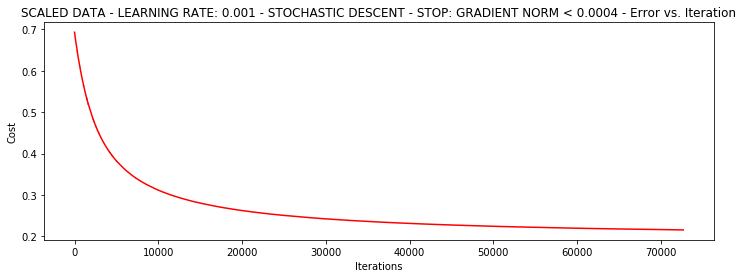

In [86]:
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

随机梯度下降更快，但是我们需要迭代的次数也需要更多，所以还是用batch的比较合适！！！

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.004
Theta: [[1.18962994 2.87545417 2.63980626]] - Iter: 7531 - Last cost: 0.21 - Duration: 1.40s


array([[1.18962994, 2.87545417, 2.63980626]])

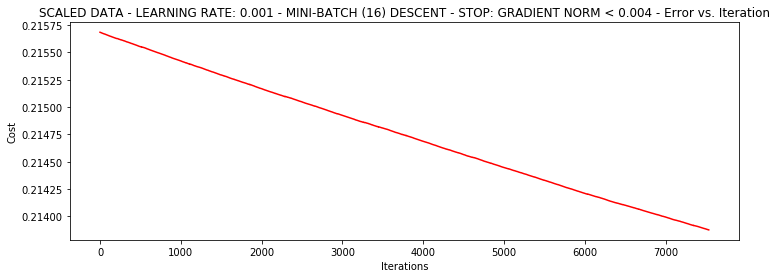

In [87]:
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.002*2, alpha=0.001)

### 精度

In [88]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [89]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
